# Exercise project 1 – ANN for Regression from Kaggle Approach with Visualizations

This project focused on predicting life expectancy using an artificial neural network. The dataset contained 15 features, including continuous variables like BMI, adult mortality, schooling, and GDP.

In [ ]:
!pip install -q seaborn

### Step 0: Importing libraries and loading the dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from tqdm.keras import TqdmCallback

In [ ]:
# STEP 1: Dataset
# 4 numeric cols, 1 continous target, logical trend

In [ ]:
folder_path = "/content/drive/MyDrive/deeplearning2024_VincenzinaSoos/ex_1"
os.chdir(folder_path)
data = pd.read_csv("data/life_expectancy.csv")

### Step 1: Data analysis and visualisations

creating a copy of the dataset, so I do not have to reload the dataset, when I want to rerun the notebook

In [ ]:
df = data.copy()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


checking datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['Life expectancy'].describe()

,Life expectancy
count,2928.000000
mean,69.224932
std,9.523867
min,36.300000
25%,63.100000
50%,72.100000
75%,75.700000
max,89.000000


Histogram for life expectacy distribution

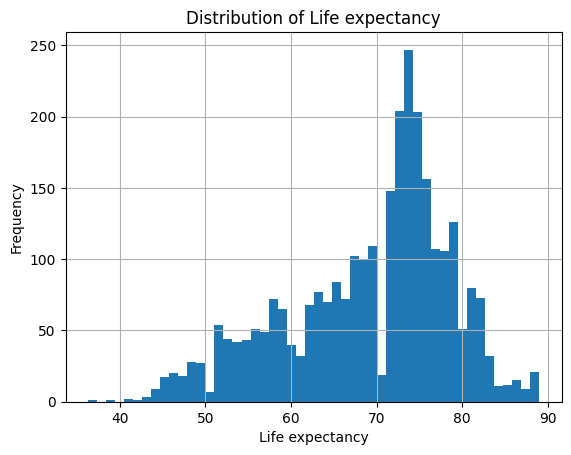

In [ ]:
df['Life expectancy'].hist(bins=50)
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life expectancy')
plt.show()

Boxplot Life Expactancy

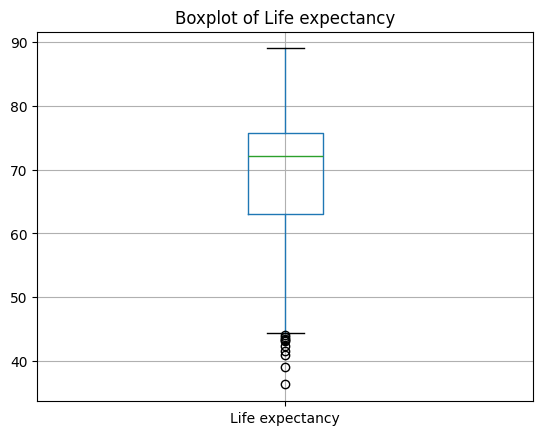

In [ ]:
df.boxplot(column='Life expectancy')
plt.title('Boxplot of Life expectancy')
plt.show()

In [ ]:
df['Life expectancy'].skew()

np.float64(-0.6386047358773552)

### Step 2: Data pre-processing

In [ ]:
# STEP 2: Clean and Preprocess
# missing values, encode non-num cols, balance, visualisation

In [ ]:
# drop rows where the target ('Life expectancy') is missing
df = df.dropna(subset=['Life expectancy'])

In [ ]:
# For the remaining missing numeric values, fill with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [ ]:
# Drop 'Country' (optional, as it might be too high-dimensional)
df = df.drop(columns=['Country'])

In [ ]:
# one-hot encode the 'Status' column
df = pd.get_dummies(df, columns=['Status'], drop_first=True)

In [ ]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


In [ ]:
# Train/Test Split
# 70% 30% / 80% 20%

In [ ]:
# Define target and features
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

In [ ]:
# Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2342, 20)
Test set shape: (586, 20)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Architecture

In [ ]:
# ANN Model
# Dense Layers, input = features, output = 1

In [ ]:
# Get number of features for the input layer
input_dim = X_train_scaled.shape[1]  # Number of features

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 32)                  │             672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit Visualise
# Fit model
# Visualise (scatter plot), prediction distribution, trainaing loss / epochs

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [ ]:
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[(TqdmCallback(verbose=1, leave=False)),early_stop, reduce_lr],
                    verbose=0) # here I used Tqdm Callbacks because i do not like when the training uses the entire screen

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

### Step 4: Model Evaluation

The training loss (MSE) dropped significantly after only a couple of epochs, then it plateoud

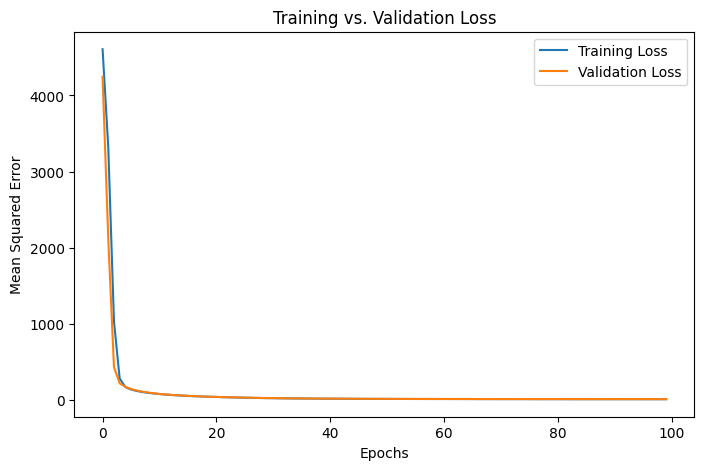

In [ ]:
# Ploting training and validation loss over epochs
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.show()

In [ ]:
# Evaluate with metrics
# MAE, MSE, RMSE, R2, explained Variance Score

In [ ]:
# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


The model's predictions are quite accurate, with an average error of about 2.39 units (MAE) and a typical error of about 3.28 units (RMSE), while explaining nearly 88% of the data's variance (R² and explained variance), which indicates very good performance.

In [ ]:
# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)
print("Explained Variance Score:", explained_var)

Mean Absolute Error (MAE): 2.3924175522840065
Mean Squared Error (MSE): 10.763065779606105
Root Mean Squared Error (RMSE): 3.2807111697932365
R-squared: 0.8755706341246743
Explained Variance Score: 0.8757807006152399


This scatter plot compares true life expectancy (x-axis) with predicted life expectancy (y-axis). Most points cluster around the line, the model is performing well in forecasting life expectancy values.

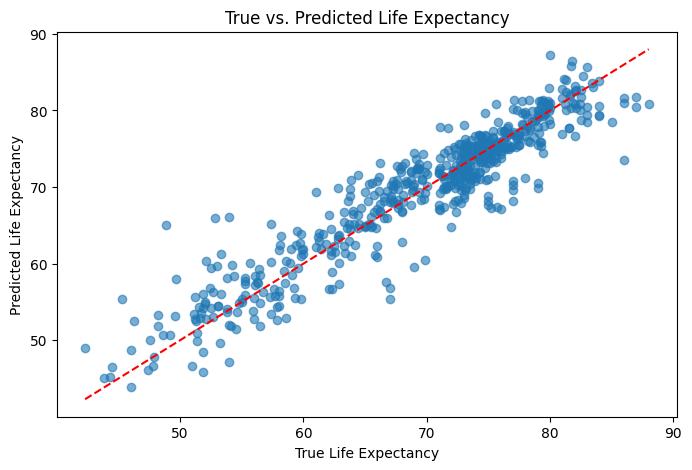

In [ ]:
# Scatter plot of true values vs. predictions
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("True vs. Predicted Life Expectancy")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

### Step 5: Predictions

In [ ]:
# Predict New Data
# imaginary input, correlation matrics, to identify key features

I think based on my imaginary values it seems reasonable to get 71 years, here it was important for me to not get an outragous number.

In [ ]:
new_sample = pd.DataFrame({
    'Year': [2020],
    'Adult Mortality': [200],
    'infant deaths': [50],
    'Alcohol': [0.5],
    'percentage expenditure': [70],
    'Hepatitis B': [80],
    'Measles': [100],
    'BMI': [20],
    'under-five deaths': [40],
    'Polio': [75],
    'Total expenditure': [8],
    'Diphtheria': [90],
    'HIV/AIDS': [0.1],
    'GDP': [500],
    'Population': [1000000],
    'thinness  1-19 years': [15],  # Note the two spaces here to match the training data!
    'thinness 5-9 years': [15],
    'Income composition of resources': [0.5],
    'Schooling': [10],
    'Status_Developing': [1]  # Encoded column for 'Developing'
})

# Reindex new_sample to ensure the order and keys match exactly those in X
new_sample = new_sample.reindex(columns=X.columns)

# Scale the new sample using the fitted scaler
new_sample_scaled = scaler.transform(new_sample)

# Make a prediction with the model
new_prediction = model.predict(new_sample_scaled)
print("Predicted Life Expectancy for the new sample:", new_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted Life Expectancy for the new sample: 71.047905


### Personal Analysis / Refelection

In [ ]:
# STEP 8: Personal Analysis
# thoughts after every phase, code explaination, real life uses, challenges, ideas

I used a basic feed-forward ANN with three Dense layers in total and ReLU activations, which was then followed by a single output node for regression. After preprocessing the data, I trained the model using MSE as the loss function and evaluated it using RMSE, MAE, R², and Explained Variance.



The ANN model outperformed the linear model across all key metrics.

-- Lower **MAE**, meaning on average it made fewer errors in absolute terms.

-- Lower **RMSE**, showing smaller deviations from true values.

-- Higher **R²**, explaining more of the variance in life expectancy.

-- A better **Explained Variance**, indicating improved stability of the predictions.


The results suggest that the relationship between the features and life expectancy is not entirely linear. While the linear model gave a reasonable baseline with an R² of 0.80, the ANN captured more complex interactions, pushing the R² up to 0.86.

The difference is most noticeable in high and low predictions. The linear model tended to underpredict very high life expectancy values and overpredict in the lower range, whereas the ANN was more accurate across the entire range.

### EXTRA: GUI

I also implemented a basic UI using ipywidgets to input new feature values and get a live prediction. This was surprisingly helpful in understanding how small changes (e.g., in BMI or schooling) affected life expectancy. For example, increasing schooling from 10 to 14 years could raise life expectancy by about 2 years according to the model, and increasing BMI too far beyond 25 started to have a negative effect.

For this I asked ChatGPT help because it was very tedious work, due to the many features in this dataset.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# layout and style for the widgets
common_layout = widgets.Layout(width='400px')
common_style = {'description_width': '180px'}

#  input widgets for each feature with updated layout/style
year_widget = widgets.IntText(value=2020, description='Year:', layout=common_layout, style=common_style)
adult_mortality_widget = widgets.FloatText(value=200, description='Adult Mortality:', layout=common_layout, style=common_style)
infant_deaths_widget = widgets.IntText(value=50, description='Infant Deaths:', layout=common_layout, style=common_style)
alcohol_widget = widgets.FloatText(value=0.5, description='Alcohol:', layout=common_layout, style=common_style)
perc_expenditure_widget = widgets.FloatText(value=70, description='Perc. Expenditure:', layout=common_layout, style=common_style)
hepatitis_b_widget = widgets.FloatText(value=80, description='Hepatitis B:', layout=common_layout, style=common_style)
measles_widget = widgets.IntText(value=100, description='Measles:', layout=common_layout, style=common_style)
bmi_widget = widgets.FloatText(value=20, description='BMI:', layout=common_layout, style=common_style)
underfive_deaths_widget = widgets.IntText(value=40, description='Under-five Deaths:', layout=common_layout, style=common_style)
polio_widget = widgets.FloatText(value=75, description='Polio:', layout=common_layout, style=common_style)
total_expenditure_widget = widgets.FloatText(value=8, description='Total Expenditure:', layout=common_layout, style=common_style)
diphtheria_widget = widgets.FloatText(value=90, description='Diphtheria:', layout=common_layout, style=common_style)
hiv_aids_widget = widgets.FloatText(value=0.1, description='HIV/AIDS:', layout=common_layout, style=common_style)
gdp_widget = widgets.FloatText(value=500, description='GDP:', layout=common_layout, style=common_style)
population_widget = widgets.FloatText(value=1000000, description='Population:', layout=common_layout, style=common_style)

# Use two spaces in the key to match training data: "thinness  1-19 years"
thinness_1_19_widget = widgets.FloatText(value=15, description='Thinness  1-19:', layout=common_layout, style=common_style)
thinness_5_9_widget = widgets.FloatText(value=15, description='Thinness 5-9:', layout=common_layout, style=common_style)
income_comp_widget = widgets.FloatText(value=0.5, description='Income Comp:', layout=common_layout, style=common_style)
schooling_widget = widgets.FloatText(value=10, description='Schooling:', layout=common_layout, style=common_style)
status_developing_widget = widgets.IntText(value=1, description='Status Dev:', layout=common_layout, style=common_style)

# button to trigger the prediction
predict_button = widgets.Button(description='Predict Life Expectancy', layout=common_layout)
output = widgets.Output()

def predict_life_expectancy(b):
    with output:
        output.clear_output()
        # new sample DataFrame using the widget values
        new_sample = pd.DataFrame({
            'Year': [year_widget.value],
            'Adult Mortality': [adult_mortality_widget.value],
            'infant deaths': [infant_deaths_widget.value],
            'Alcohol': [alcohol_widget.value],
            'percentage expenditure': [perc_expenditure_widget.value],
            'Hepatitis B': [hepatitis_b_widget.value],
            'Measles': [measles_widget.value],
            'BMI': [bmi_widget.value],
            'under-five deaths': [underfive_deaths_widget.value],
            'Polio': [polio_widget.value],
            'Total expenditure': [total_expenditure_widget.value],
            'Diphtheria': [diphtheria_widget.value],
            'HIV/AIDS': [hiv_aids_widget.value],
            'GDP': [gdp_widget.value],
            'Population': [population_widget.value],
            'thinness  1-19 years': [thinness_1_19_widget.value],  # Note the two spaces here!
            'thinness 5-9 years': [thinness_5_9_widget.value],
            'Income composition of resources': [income_comp_widget.value],
            'Schooling': [schooling_widget.value],
            'Status_Developing': [status_developing_widget.value]
        })
        # new_sample to exactly match the columns (and order) used during training
        new_sample = new_sample.reindex(columns=X.columns)

        # scaling the new sample using the fitted scaler
        new_sample_scaled = scaler.transform(new_sample)

        # predict
        new_prediction = model.predict(new_sample_scaled)
        print("Predicted Life Expectancy for the new sample:", new_prediction[0][0])

predict_button.on_click(predict_life_expectancy)

widget_box = widgets.VBox([
    year_widget,
    adult_mortality_widget,
    infant_deaths_widget,
    alcohol_widget,
    perc_expenditure_widget,
    hepatitis_b_widget,
    measles_widget,
    bmi_widget,
    underfive_deaths_widget,
    polio_widget,
    total_expenditure_widget,
    diphtheria_widget,
    hiv_aids_widget,
    gdp_widget,
    population_widget,
    thinness_1_19_widget,
    thinness_5_9_widget,
    income_comp_widget,
    schooling_widget,
    status_developing_widget,
    predict_button,
    output
])

display(widget_box)


### EXTRA: Advanced

In [ ]:
# Advanced Task:
# 1 Compare with Linear Regression using scikit-learn
# 1 Try same model on linear and non-linear datasets
# 1 Compare performance

# 2 Use Dropout layers, EarlyStopping, ReduceLRONPLateau

In [ ]:
# EXTRA TASK: Linear Regression using scikit-learn

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)
explained_var_lin = explained_variance_score(y_test, y_pred_lin)

In [ ]:
print("\nLinear Regression Model Evaluation:")
print("Mean Absolute Error (MAE):", mae_lin)
print("Mean Squared Error (MSE):", mse_lin)
print("Root Mean Squared Error (RMSE):", rmse_lin)
print("R-squared:", r2_lin)
print("Explained Variance Score:", explained_var_lin)


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 2.9273470418392806
Mean Squared Error (MSE): 15.615945975018429
Root Mean Squared Error (RMSE): 3.951701655618555
R-squared: 0.8194675852584078
Explained Variance Score: 0.8196348057061896


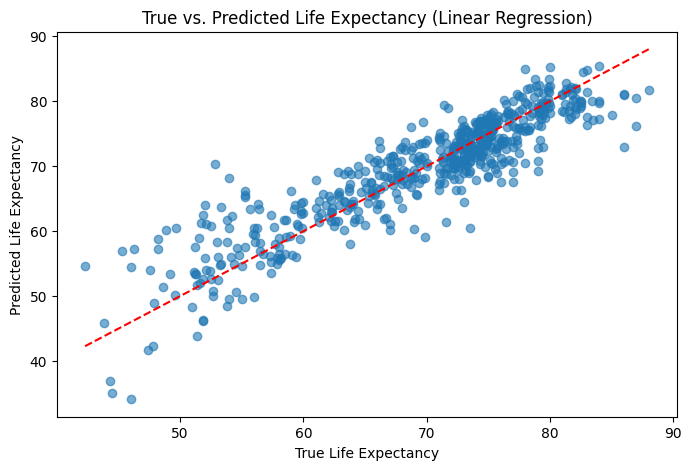

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.xlabel("True Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("True vs. Predicted Life Expectancy (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()